In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import pandas as pd
from scipy.optimize import least_squares, curve_fit

In [ ]:
#Sr-90

#Al and Count rate/second arrays

Cr_sb = 0.1833333 #background counts/second

t = 60 #Time for 1 measurment



Al = np.array([0.195,0.446,0.685,0.97,1.19,1.42,2.151,2.41,2.66,2.88,3.12,3.36,3.61,3.89,4.13,4.38,4.65,4.835,5.09,5.35]) #mm

Cr_s = np.array([78.4,46.4,36.1,24.28,18.47,13.37,5.85,3.6,3.2,1.93,1.65,1.63,1.77,1.58,1.33,1.6,1.2,1.55,1.11,1.55]) - Cr_sb#Counts/second


print(Cr_s)
print(Al)

[78.2166667 46.2166667 35.9166667 24.0966667 18.2866667 13.1866667
  5.6666667  3.4166667  3.0166667  1.7466667  1.4666667  1.4466667
  1.5866667  1.3966667  1.1466667  1.4166667  1.0166667  1.3666667
  0.9266667  1.3666667]
[0.195 0.446 0.685 0.97  1.19  1.42  2.151 2.41  2.66  2.88  3.12  3.36
 3.61  3.89  4.13  4.38  4.65  4.835 5.09  5.35 ]


In [ ]:
#Errors

xerr = np.array([4.08e-3,2.35e-3,4.08e-3,4.7e-3,4.7e-3,0.0164,2.36e-3,0.0165,8.16e-3,0.026,4.17e-3,2.36e-3,0.012,4.71e-4,4.7e-3,4.71e-3,0.028,7.07e-3,4.71e-3,0.012]) 

t_err = 1 #error on the time


Cr_sberr = np.sqrt(Cr_sb) #error on background rate

#error on count rate

Cr_serr = np.sqrt((Cr_s**2)/(t**2) + ((Cr_s**2) * (t_err**2)/t**4))

Backerr = np.sqrt((Cr_sberr**2)/t**2) + ((Cr_sb**2)*(t_err**2)/t**4)


yerr = np.sqrt(Cr_serr**2 + Backerr**2)
print(xerr)

[0.00408  0.00235  0.00408  0.0047   0.0047   0.0164   0.00236  0.0165
 0.00816  0.026    0.00417  0.00236  0.012    0.000471 0.0047   0.00471
 0.028    0.00707  0.00471  0.012   ]


In [ ]:
xData = Al

yData = Cr_s

In [ ]:
#Log of the data

yData2 = np.log(yData)

#Log error

Lyerr = np.sqrt((yerr/Cr_s))

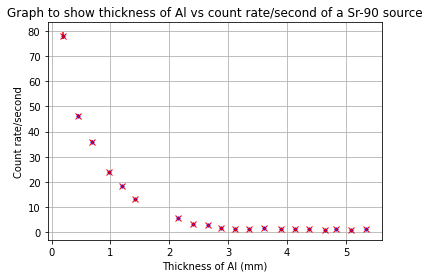

In [ ]:
#Al vs Count rate/second

plt.plot(xData, yData, color = 'b', linestyle = '', marker = '.')
plt.errorbar(xData, yData, yerr, xerr, fmt = "rx")
plt.title("Graph to show thickness of Al vs count rate/second of a Sr-90 source")
plt.ylabel("Count rate/second")
plt.xlabel("Thickness of Al (mm)")
plt.grid()
plt.show()

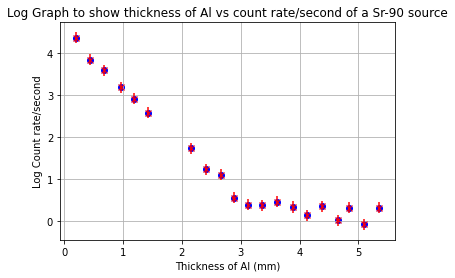

In [ ]:
#Al vs log of count rate/second 

plt.scatter(xData, yData2, color = 'b', linestyle = '-')
plt.errorbar(xData, yData2, Lyerr, xerr, fmt = "rx")
plt.title("Log Graph to show thickness of Al vs count rate/second of a Sr-90 source")
plt.ylabel("Log Count rate/second")
plt.xlabel("Thickness of Al (mm)")
plt.grid()
plt.show()

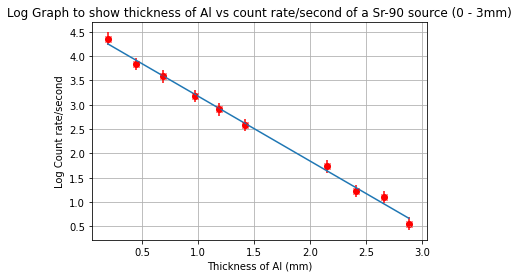

chi squared value = 416.332614012817


LinregressResult(slope=-1.3345757930988058, intercept=4.509458374218191, rvalue=-0.9977449607083275, pvalue=1.1282849716089263e-10, stderr=0.03174137861142973, intercept_stderr=0.05578222598360821)

In [ ]:
#Al vs log of count rate/second for just the linear component 

plt.scatter(xData[:10], yData2[:10], color = 'r', linestyle = '-')
m, b = np.polyfit(xData[:10], yData2[:10], 1)
plt.plot(xData[:10], m*xData[:10] + b)
plt.errorbar(xData[:10], yData2[:10], Lyerr[:10], xerr[:10], fmt = "rx")
plt.title("Log Graph to show thickness of Al vs count rate/second of a Sr-90 source (0 - 3mm)")
plt.ylabel("Log Count rate/second")
plt.xlabel("Thickness of Al (mm)")
plt.grid()
plt.show()

#Chi squred
nPoints = len(yData[:10])
nPars = 2

yDataE = (-1.3345793098858 * Al[:10]) + (4.509458374218191)

chi = np.sum(((xData[:10] - yDataE)**2)/(Lyerr[:10]**2))

NDF = nPoints - nPars
chisqndf = chi/NDF

print("chi squared value =",chisqndf)
linregress(xData[:10], yData2[:10])

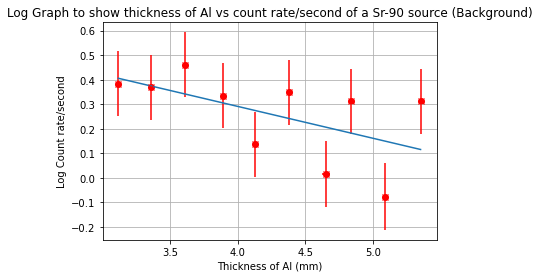

chi squared value = 472.89517084742283


LinregressResult(slope=-0.13766671999974264, intercept=0.8472092303094012, rvalue=-0.5193693975286873, pvalue=0.15186895003152087, stderr=0.08561325042386188, intercept_stderr=0.37776202017235844)

In [ ]:
#Al vs log of count rate/second for just the background

plt.scatter(xData[10:20], yData2[10:20], color = 'r', linestyle = '-')
m, b = np.polyfit(xData[10:20], yData2[10:20], 1)
plt.plot(xData[10:20], m*xData[10:20] + b)
plt.errorbar(xData[10:20], yData2[10:20], Lyerr[10:20], xerr[10:20], fmt = "rx")
plt.title("Log Graph to show thickness of Al vs count rate/second of a Sr-90 source (Background)")
plt.ylabel("Log Count rate/second")
plt.xlabel("Thickness of Al (mm)")
plt.grid()
plt.show()

nPoints = len(yData[10:20])
nPars = 2

yDataE2 = (-0.13766671999974264 * Al[10:20]) + (0.8472092303094012)

chi = np.sum(((xData[10:20] - yDataE)**2)/(Lyerr[10:20]**2))

NDF = nPoints - nPars
chisqndf = chi/NDF

print("chi squared value =",chisqndf)

linregress(xData[11:20], yData2[11:20])

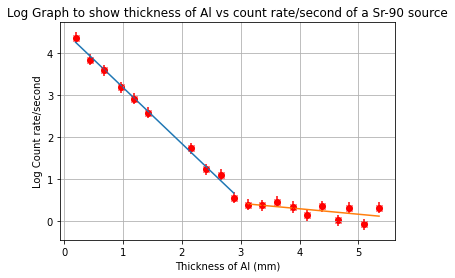

In [ ]:
plt.scatter(xData[:10], yData2[:10], color = 'r', linestyle = '-')
m, b = np.polyfit(xData[:10], yData2[:10], 1)
plt.plot(xData[:10], m*xData[:10] + b)
plt.scatter(xData[10:20], yData2[10:20], color = 'r', linestyle = '-')
m, b = np.polyfit(xData[10:20], yData2[10:20], 1)
plt.plot(xData[10:20], m*xData[10:20] + b)
plt.errorbar(xData, yData2, Lyerr, xerr, fmt = "rx")
plt.title("Log Graph to show thickness of Al vs count rate/second of a Sr-90 source")
plt.ylabel("Log Count rate/second")
plt.xlabel("Thickness of Al (mm)")
plt.grid()
plt.show()


In [ ]:
#Solving simultaneous equations to find the intercept of the two lines of best fit.

A = np.array([[1,1.334575793088058], [1,0.1376671999974264]])

B = np.array([-4.50945837421,-0.8472092302094012])

C = abs(np.linalg.solve(A, B))

print("The y and x values are",C) #Electron range

The y and x values are [0.42598109 3.05975675]


In [ ]:
#Errors on the Electron range

m1 = -1.3345757930988058

m2 = -0.13766671999974264

c1 = 4.509458374218191

c2 = 0.8472092303094012

m1err = 0.03174137861142973

m2err = 0.08561325042386188

c1err = 0.05578222598360821

c2err = 0.37776202017235844

m3 = m2 - m1

m3err = np.sqrt((m1err)**2 + (m2err)**2)

c3 = c2 - c1

c3err = np.sqrt((c1err)**2 + (c2err)**2)

dx_dm3 = (c3*np.log(m3))*m3err

dx_dc3 = (1/m3)*c3err

ferr = np.sqrt((dx_dm3)**2 + (dx_dc3)**2)

print(ferr)


0.3246493496349601


In [ ]:
# Expected energy value

eR = 3.05975675/10

p = 2.71 #density of Al

R = eR*p #Electron range in g/cm^2

E1 = (R + 0.132)/0.541

E2 = (R/0.407)**(1/1.38)

Eerr = E1*ferr



print("Energy value 1 =",E1,"Mev")
print("Energy value 2 =",E2,"Mev")
print("Final energy value =",E1,"+-",Eerr,"Mev")

Energy value 1 = 1.7766988525878002 Mev
Energy value 2 = 1.674780184870097 Mev
Final energy value = 1.7766988525878002 +- 0.5768041269898092 Mev


In [ ]:
#V-52

Vdata = pd.read_csv("V52.csv")

print(Vdata)

       1    10  2524
0      2    20  2484
1      3    30  2511
2      4    40  2299
3      5    50  2268
4      6    60  2277
..   ...   ...   ...
368  370  3700   278
369  371  3710   267
370  372  3720   247
371  373  3730   262
372  374  3740   264

[373 rows x 3 columns]


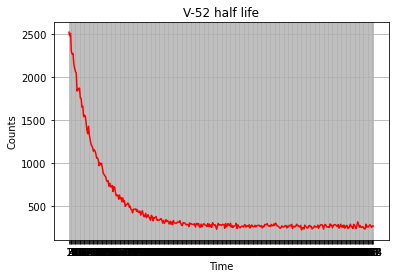

In [ ]:
import csv

Time = []

Counts = []
with open("V52.csv","r") as csvfile:
    lines = csv.reader(csvfile, delimiter=",")
    for row in lines:
        Time.append(row[0])
        Counts.append(int(row[2]))

        
plt.plot(Time, Counts, color = "r")
plt.title("V-52 half life")
plt.xlabel("Time")
plt.ylabel("Counts")
plt.grid()
plt.show()

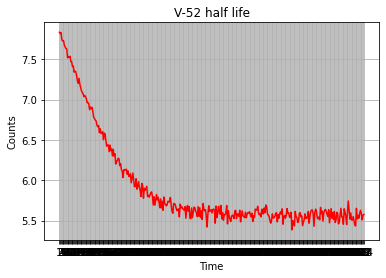

In [ ]:
LCounts = np.log(Counts)

plt.plot(Time, LCounts, color = "r")
plt.title("V-52 half life")
plt.xlabel("Time")
plt.ylabel("Counts")
plt.grid()
plt.show()


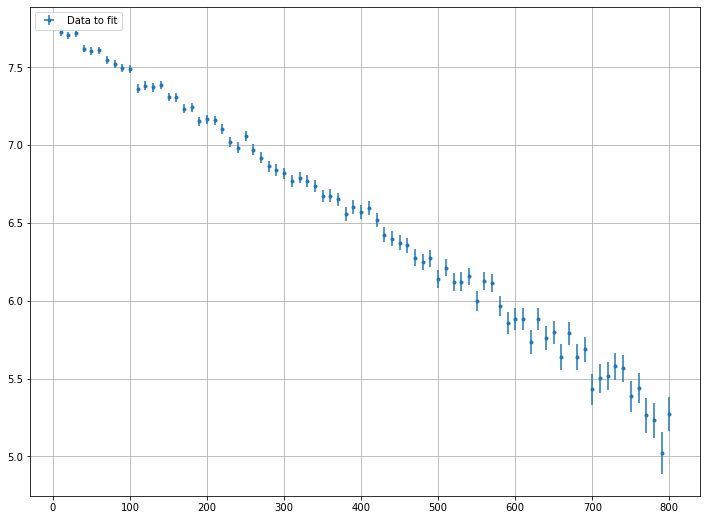

In [ ]:
#Load in file

jhg, Time, Counts = np.loadtxt("V52.csv", delimiter = ",", unpack = True)


m = 75

c = 5

#x error
xerr = 0.01

#y error
yerr1 = np.sqrt(Counts[:80])

background = 264.9064 
bgerr = 1.066262867
 
BCounts = Counts[:80] - background

#Log of counts

LCounts = np.log(BCounts)

#Combining errors

yerr = np.sqrt((bgerr)**2 + (yerr1)**2)

initParams = np.array([m,c])

xdata = Time[:80]
ydata = LCounts

xerror = xerr

yerror = yerr/BCounts

fig = plt.figure(figsize = (12,9))
plt.errorbar(xdata, ydata, yerror, xerror, marker = ".", linestyle = "", label = "Data to fit")
plt.legend(loc = 2)
plt.grid()
plt.show()


In [ ]:
def fitFunc(p, x):
    '''
    Fit function
    '''
    f = p[0] * np.exp(-p[1] * x) + p[2]
    return f

def fitFuncDiff(p, x):
    '''
    Differential of fit function
    '''
    df = -p[0]*p[1] * np.exp(-p[1] * x)
    return df

def calcChiSq(p, x, y, xerr, yerr):
    '''
    Error function for fit
    '''
    e = (y - fitFunc(p, x))/(np.sqrt(yerr**2 + fitFuncDiff(p, x)**2*xerr**2))
    return e

In [ ]:
def fitStdError(jacMatrix):

    # Compute covariance
    jMat2 = np.dot(jacMatrix.T, jacMatrix)
    detJmat2 = np.linalg.det(jMat2)
    
    # Prepare output
    output = np.zeros(jMat2.shape[0])
    if detJmat2 < 1E-32:
        print("Value of determinat detJmat2",detJmat2)
        print("Matrix singular, error calculation failed.")
        return output
    else:
        covar = np.linalg.inv(jMat2)
        for i in range(len(output)):
            output[i] = np.sqrt(covar[i, i])
            
        return output

Fitted parameters a: 10.00, b: 0.00, c: -2.20
Parameter errors: a: 1.96, b: 0.00, c: 1.96
ChiSq = 1.08e+02, ChiSq/NDF =  1.40.


<ipython-input-18-8e90fba04dd5>:5: RuntimeWarning: overflow encountered in exp
  f = p[0] * np.exp(-p[1] * x) + p[2]
<ipython-input-18-8e90fba04dd5>:12: RuntimeWarning: overflow encountered in exp
  df = -p[0]*p[1] * np.exp(-p[1] * x)
<ipython-input-18-8e90fba04dd5>:19: RuntimeWarning: overflow encountered in square
  e = (y - fitFunc(p, x))/(np.sqrt(yerr**2 + fitFuncDiff(p, x)**2*xerr**2))
<ipython-input-18-8e90fba04dd5>:19: RuntimeWarning: invalid value encountered in true_divide
  e = (y - fitFunc(p, x))/(np.sqrt(yerr**2 + fitFuncDiff(p, x)**2*xerr**2))


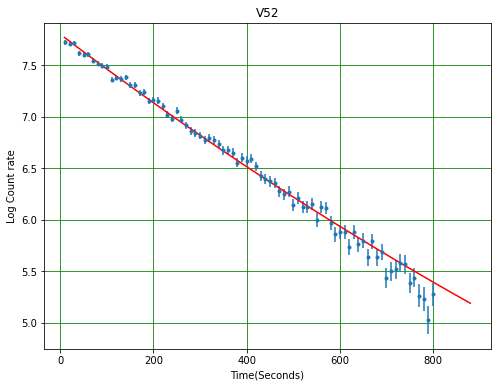

LinregressResult(slope=-0.0031556634638465367, intercept=7.7853163232174065, rvalue=-0.9966386201775905, pvalue=1.5914449778517182e-86, stderr=2.937069314985585e-05, intercept_stderr=0.013692855285147241)

In [ ]:
# Set initial values of fit parameters
#          0         1        2         
#          A         b         c  
pInit =   [1,        1,       -1]
lBounds = [-10,      -10,     -10]
uBounds = [10,       10,       10]
nPoints = len(xdata)
nPars = 3

# Run fit
output = least_squares(calcChiSq, pInit, args = (xdata, ydata, xerror, yerror),
                    bounds = (lBounds, uBounds))



# Get least_squares output, stored in array output.x[]
A = output.x[0]
b = output.x[1]
c = output.x[2]

# Get errors from our fits using fitStdError(), defined above
pErrors = fitStdError(output.jac)
d_A = pErrors[0]
d_b = pErrors[1]
d_c = pErrors[2]

# Output fit parameters
print("Fitted parameters a: {0:.2f}, b: {1:.2f}, c: {2:.2f}".format(A, b, c))
print("Parameter errors: a: {0:.2f}, b: {1:.2f}, c: {2:.2f}".format(d_A, d_b, d_c))



# Calculate chis**2 per point, summed chi**2 and chi**2/NDF
chiarr = calcChiSq(output.x, xdata, ydata, xerror, yerror)**2
chisq = np.sum(chiarr)
NDF = nPoints - nPars
chisqndf = chisq/NDF
print("ChiSq = {:5.2e}, ChiSq/NDF = {:5.2f}.".format(chisq, chisqndf))

# Calculate fitted y-values using our fit parameters and the original fit function
xPlot = np.linspace(0.9*np.min(xdata), 1.1*np.max(xdata), 100)
fitData = fitFunc(output.x, xPlot)

# Make the plot of the data and the fit
fig = plt.figure(figsize = (8, 6))
plt.title('V52')
plt.xlabel('Time(Seconds)')
plt.ylabel('Log Count rate')
plt.grid(color = 'g')
plt.errorbar(xdata, ydata, yerror, xerror, marker='.', linestyle='', label='data')
plt.plot(xPlot, fitData, color = 'r')
plt.show()

linregress(xdata, ydata)

In [ ]:
dc = -0.0031556634638465367 #decay constant

hl = np.log(2)/-dc #half life

print("half life =",hl,"Seconds")

mhl = hl/60 #half life in mins

dcerr = 2.937069314985585e-05 #error on decay constant 

mhlerr = (dcerr/dc)*mhl

print("half life =",mhl,"+-",mhlerr,"minutes")

half life = 219.65180650633974 Seconds
half life = 3.660863441772329 +- -0.03407273875800375 minutes


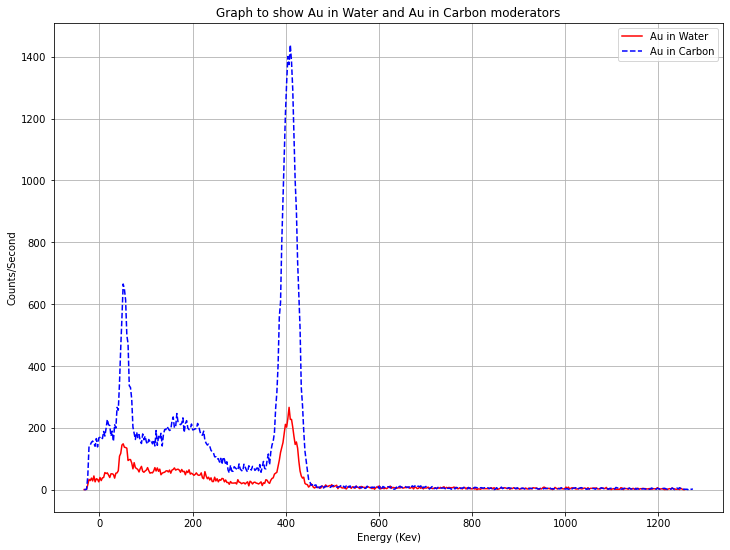

In [ ]:
#Gold in Water and Carbon

jhg, Energy, Counts = np.loadtxt("Au_W.csv", delimiter = ",", unpack = True)
jhg, Energy2, Counts2 = np.loadtxt("Au_C.csv", delimiter = ",", unpack = True)


xData = Energy
yData = Counts

xData2 = Energy2
yData2 = Counts2

fig = plt.figure(figsize = (12,9))
plt.plot(xData, yData, color = 'r', linestyle = '-', label = "Au in Water")
plt.plot(xData2, yData2, color = 'b', linestyle = '--', label = "Au in Carbon")
plt.title("Graph to show Au in Water and Au in Carbon moderators")
plt.ylabel("Counts/Second")
plt.xlabel("Energy (Kev)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Gold activity ratio

Wcps = 2732.13/300   

Ccps = 18387.7/300

Wm = 6.9
Cm = 3.9

#ratio - water/carbon

water = (Wcps/Wm)/0.5

carbon = (Ccps/Cm)/3

r = water/carbon

print("ratio of water/carbon activitys =",r,"Bq/g/ci")
print("therefore Carbon is a way better moderator than water")

ratio of water/carbon activitys = 0.5038957753186144 Bq/g/ci
therefore Carbon is a way better moderator than water


In [ ]:
#Eu-152 and In-116 

Euenergy = np.array([121.8, 244.7,344.3,500,778.9,964.1,1408]) 

Eueff = np.array([4.52E-02,2.53E-02,1.75E-02,1.19E-02,7.67E-03,6.31E-03,4.61E-03])

Inenergy = np.array([138.35,416.95,818.71,1097.2,1293.48,1507.45])

Ineff = np.array([4.23E-02,1.43E-02,7.31E-03,5.66E-03,4.97E-03,4.32E-03])

xData = Euenergy

yData = Eueff

xData2 = Inenergy

yData2 = Ineff


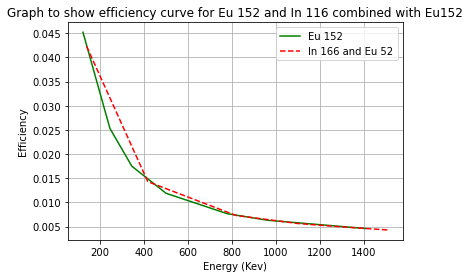

In [ ]:
plt.plot(xData, yData, color = 'g', linestyle = '-', label = "Eu 152")
plt.plot(xData2, yData2, color = 'r', linestyle = '--', label = "In 166 and Eu 52")
plt.title("Graph to show efficiency curve for Eu 152 and In 116 combined with Eu152")
plt.ylabel("Efficiency")
plt.xlabel("Energy (Kev)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Energy vs activity for In 116

t = 300

Ineff2 = np.array([4.23E-02,1.43E-02,7.31E-03,5.66E-03,4.97E-03,4.32E-03])

Inenergy2 = np.array([138.35,416.95,818.71,1097.2,1293.48,1507.45])

T = np.array([3.90,32.8,13.6,66.6,100.2,11.8])#gamma fraction

IY = np.array([1216.57,7532,1682.27,6909.68,8067.68,879.73]) #Net area

A0 = IY/(T*t*Ineff2)
print(A0)

#errors
terr = 0.1

IYerr = np.array([325.47,157.51,126.79,163.76,129.7,63.24])  

Terr = np.array([0.14,0.14,0.5,0.13,0.2,0.4])

#error in effecency negligable

Tterr = np.sqrt((Terr/T)**2 + (terr/t)**2)

ferr = np.sqrt((Tterr/T*t)**2 + (IYerr/IY)**2)

Inenergyerr = np.array([0.01,0.01,0.02,0.01,0.01,0.03])

xerr3 = Inenergyerr
yerr3 = ferr

xData3 = A0
yData3 = Inenergy2 
print(ferr)

[24.58164111 53.52777304 56.40507229 61.10067665 54.00118609 57.52576376]
[2.77438922 0.04439229 0.81451397 0.02532307 0.01718031 0.86485568]


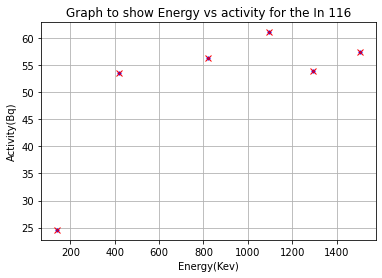

Weighted Activity = 55.987250870044136 +- 0.01353617866564288 Bq


In [ ]:
#Weighted mean

Weight = 1/(ferr[1:6])**2
A0top = np.sum(A0[1:6]*Weight)
A0bot = np.sum(Weight)

Weighterr = np.sqrt((1/np.sum(Weight)))

A0_w = A0top/A0bot

#plot

plt.plot(yData3, xData3, color = 'b', linestyle = '',marker = ".")
plt.errorbar(yData3, xData3, xerr3, yerr3, fmt = "rx")
plt.title("Graph to show Energy vs activity for the In 116")
plt.ylabel("Activity(Bq)")
plt.xlabel("Energy(Kev)")
plt.grid()
plt.show()

print("Weighted Activity =",A0_w,"+-",Weighterr,"Bq")

In [ ]:
#Thermal neutron flux from Eu-152 and In-116 

lamba = 2.2e-4
t = 300 #Seconds
ti = 10
A0f = A0_w/np.exp(-lamba*ti) #Turn into inital value

sig = 1.61e-22 #neutron capture cross section (cm^2)
m = 13.7 - 2.4 #Mass of Ln 116 minus empty container 
Av = 6.023e23
a = 0.957
wA = 115.905260

S = 1 - np.exp(-lamba*t)

nf = (A0f*wA)/(sig*m*a*S*Av)

sigerr = 5e-24

merr = 0.1 

nferr = nf*np.sqrt((Weighterr/A0_w)**2 + (merr/m)**2 + (sigerr/sig)**2)

print("Neutron flux =",nf,"+-",nferr,"neutrons/cm^2/s")

Neutron flux = 97.10186618807089 +- 3.1357169344398614 neutrons/cm^2/s


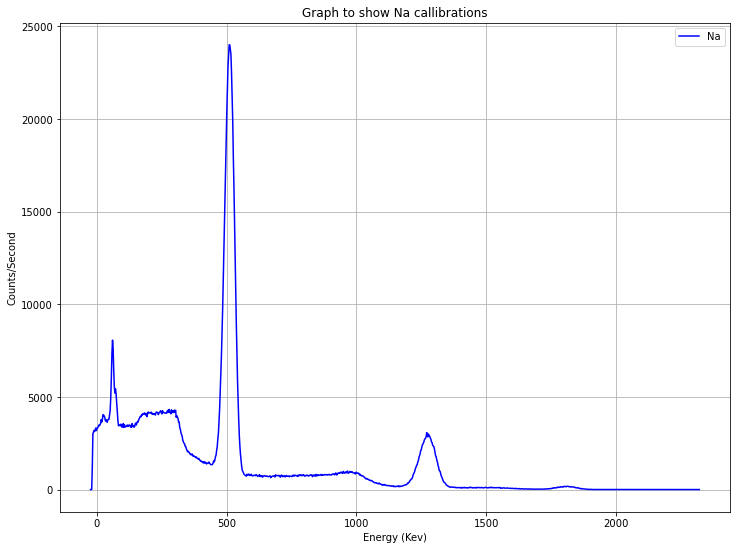

In [ ]:
#Na and Y Callibration

jhg, Energy, Counts = np.loadtxt("Na_Cal.csv", delimiter = ",", unpack = True)
jhg, Energy2, Counts2 = np.loadtxt("Y_Cal.csv", delimiter = ",", unpack = True)


xData = Energy
yData = Counts

xData2 = Energy2
yData2 = Counts2

fig = plt.figure(figsize = (12,9))
plt.plot(xData, yData, color = 'b', linestyle = '-', label = "Na")
plt.title("Graph to show Na callibrations")
plt.ylabel("Counts/Second")
plt.xlabel("Energy (Kev)")
plt.legend()
plt.grid()
plt.show()

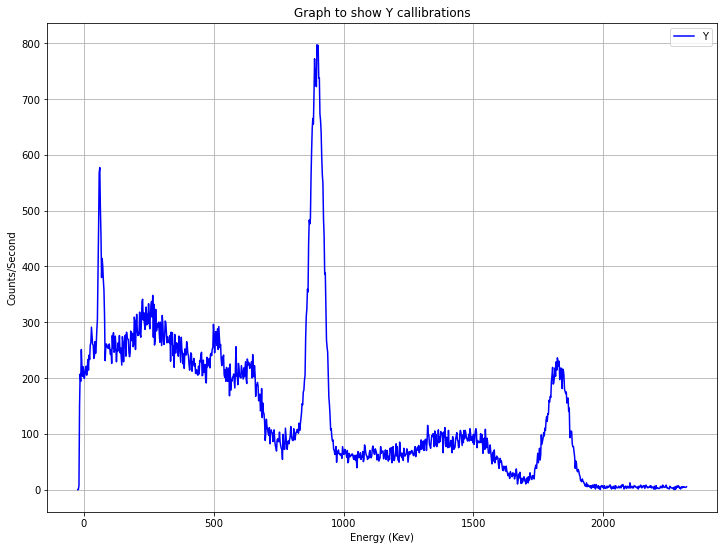

In [ ]:

fig = plt.figure(figsize = (12,9))
plt.plot(xData2, yData2, color = 'b', linestyle = '-', label = "Y")
plt.title("Graph to show Y callibrations")
plt.ylabel("Counts/Second")
plt.xlabel("Energy (Kev)")
plt.legend()
plt.grid()
plt.show()